In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd/content/Data2s
!unzip "/content/drive/My Drive/Project/NewData"

# **VGG-16**

In [ ]:
import tensorflow.compat.v1 as tf
from keras import backend as K
from keras.models import Model
from keras.callbacks import TensorBoard,ModelCheckpoint

import glob
import os

import cv2
from math import sin, cos, radians
import random
import numpy as np
from keras.models import Sequential,load_model,model_from_json


from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling1D,Cropping2D,Activation,ZeroPadding2D, Flatten, Dropout,MaxPool2D
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adadelta, RMSprop, SGD, Adam
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


import matplotlib.pyplot as plt
from statistics import mean
import numpy as np, pandas as pd, io, csv

##compute_class_weight Modules
from sklearn.utils import compute_class_weight
from sklearn.preprocessing import LabelEncoder

#confusion_matrix Modules

from sklearn.metrics import confusion_matrix


## Precision/Recall/F1_score AND Roc curve Modules
from scipy import interp
import itertools    
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


#Classifier Lib
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression    
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


##########################################################################################################################
Datapath='/content/AllDataLeukemia'

####Load target
target=[]

for img_filename in os.listdir(Datapath):
    imgtype=img_filename.split("_",1)[0]
    if (imgtype=='No'):
        target.append('0')
    if (imgtype=='Yes'):
        target.append('1')
   
#print(target)        
    

arrayofdata_=[]
arrayofdata=[]

for filename in glob.glob('/content/AllDataLeukemia/*.bmp'):
    img=cv2.imread(filename)
    img=cv2.resize(img, (70, 70), interpolation=cv2.INTER_LINEAR) 
    img=np.array(img)    
    inputdata = np.reshape(img, (img.shape[0],img.shape[1],img.shape[2]))
    inputdata=np.array(inputdata)
    arrayofdata.append(inputdata.tolist())
    arrayofdata_=arrayofdata

arrayofdata_ = np.array(arrayofdata_)
one_hot_labels = to_categorical(target, num_classes=2)

#print(one_hot_labels)
    
x_train, x_test, y_train, y_test = train_test_split(arrayofdata_,
                                                          one_hot_labels,
                                                          test_size=0.2,shuffle=True,
                                                          random_state=42)

print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],x_train.shape[2],3))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],x_test.shape[2],3))



#Reshape Data for Confusion_matrix
x_train1 = np.reshape(x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]*3))
x_test1 = np.reshape(x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]*3))
y_train1 = np.argmax(y_train, axis=1)
y_test1 = np.argmax(y_test, axis=1)


def VGGNetwork():
  model = Sequential()

  model.add(Conv2D(input_shape=(70,70,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=2, activation="softmax"))

  opt = Adam(lr=0.0001)
  model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
  model.summary()
  history=model.fit(x_train, y_train,epochs=100,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, y_test),verbose=2)

  print(mean(history.history['accuracy']))
  print(mean(history.history['val_accuracy']))



  print('loss')
  print(mean(history.history['loss']))
  print(mean(history.history['val_loss']))


  #Model Loss
  plt.plot(history.history['loss'], linewidth=2, label='Train')
  plt.plot(history.history['val_loss'], linewidth=2, label='Test')
  plt.legend(loc='upper right')
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')    
  plt.show()

  #Model ACC
      

  plt.plot(history.history['accuracy'], linewidth=2, label='Train')
  plt.plot(history.history['val_accuracy'], linewidth=2, label='Test')
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')

  return model
#################################################Confusion_matrix Code#########################################


Net=VGGNetwork()
Net = Net.predict(x_test)
classification=np.argmax(Net)
y_pred_2=Net.argmax(axis=-1)

class_names=["Healthy","Leukemia"]


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

cnf_matrix = confusion_matrix(y_test1, y_pred_2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()




#################################################Precision/Recall/F1_score AND Roc curve#########################################
  
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(y_test[i],Net[i])
                                                            
    average_precision[i] = average_precision_score(y_test[i], Net[i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
        Net.ravel())
average_precision["micro"] = average_precision_score(y_test, Net,
                                                          average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))

    

precision_=mean(precision["micro"])
recall_=mean(recall["micro"])
f_Score=2*((precision_*recall_)/(precision_+recall_+K.epsilon()))
print(classification_report(y_test, Net.round(), target_names=class_names))
    
n_classes =2
    

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], Net[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), Net.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
              color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
              label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
              color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                  label='ROC curve of class {0} (area = {1:0.2f})'
                  ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



# ResNet-**50**

(10022, 70, 70, 3)
{0: 1.5516472628189248, 1: 0.7377222941938523}
Epoch 1/100
627/627 - 41s - loss: 0.7661 - accuracy: 0.6958 - val_loss: 1.0799 - val_accuracy: 0.4657
Epoch 2/100
627/627 - 29s - loss: 0.5829 - accuracy: 0.7387 - val_loss: 0.6031 - val_accuracy: 0.7885
Epoch 3/100
627/627 - 28s - loss: 0.4984 - accuracy: 0.7857 - val_loss: 0.4813 - val_accuracy: 0.7901
Epoch 4/100
627/627 - 28s - loss: 0.4590 - accuracy: 0.8100 - val_loss: 0.4259 - val_accuracy: 0.8140
Epoch 5/100
627/627 - 28s - loss: 0.4358 - accuracy: 0.8184 - val_loss: 0.4446 - val_accuracy: 0.8152
Epoch 6/100
627/627 - 28s - loss: 0.4177 - accuracy: 0.8249 - val_loss: 0.4148 - val_accuracy: 0.8304
Epoch 7/100
627/627 - 28s - loss: 0.4039 - accuracy: 0.8338 - val_loss: 0.4893 - val_accuracy: 0.8276
Epoch 8/100
627/627 - 28s - loss: 0.3795 - accuracy: 0.8400 - val_loss: 0.5306 - val_accuracy: 0.8128
Epoch 9/100
627/627 - 28s - loss: 0.3748 - accuracy: 0.8432 - val_loss: 0.4816 - val_accuracy: 0.7889
Epoch 10/100
627

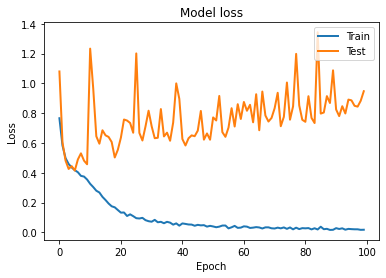

Confusion matrix, without normalization


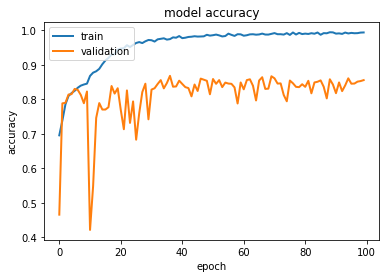

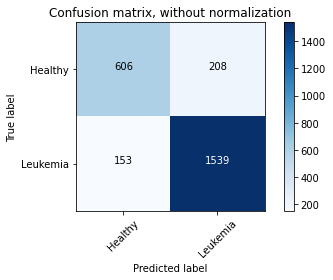

Average precision score, micro-averaged over all classes: 0.91
              precision    recall  f1-score   support

     Healthy       0.80      0.74      0.77       814
    Leukemia       0.88      0.91      0.90      1692

   micro avg       0.86      0.86      0.86      2506
   macro avg       0.84      0.83      0.83      2506
weighted avg       0.85      0.86      0.85      2506
 samples avg       0.86      0.86      0.86      2506



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:435: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


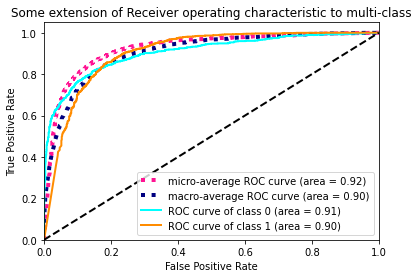

In [ ]:
import numpy as np
import glob
import os
import cv2
from math import sin, cos, radians
from statistics import mean
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np, pandas as pd, io, csv

from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Conv2D
from keras.models import Model, load_model
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adadelta, RMSprop, SGD, Adam
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow


import keras.backend as K


import matplotlib.pyplot as plt
from statistics import mean
import numpy as np, pandas as pd, io, csv

##compute_class_weight Modules
from sklearn.utils import compute_class_weight
from sklearn.preprocessing import LabelEncoder
#confusion_matrix Modules

from sklearn.metrics import confusion_matrix


## Precision/Recall/F1_score AND Roc curve Modules
from scipy import interp
import itertools    
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


#Classifier Lib
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression    
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report



##########################################################################################################################
Datapath='/content/AllDataLeukemia'

####Load target
target=[]

for img_filename in os.listdir(Datapath):
    imgtype=img_filename.split("_",1)[0]
    if (imgtype=='No'):
        target.append('0')
    if (imgtype=='Yes'):
        target.append('1')
   
#print(target)        
    

arrayofdata_=[]
arrayofdata=[]

for filename in glob.glob('/content/AllDataLeukemia/*.bmp'):
    img=cv2.imread(filename)
    img=cv2.resize(img, (70, 70), interpolation=cv2.INTER_LINEAR) 
    img=np.array(img)    
    inputdata = np.reshape(img, (img.shape[0],img.shape[1],img.shape[2]))
    inputdata=np.array(inputdata)
    arrayofdata.append(inputdata.tolist())
    arrayofdata_=arrayofdata

arrayofdata_ = np.array(arrayofdata_)
one_hot_labels = to_categorical(target, num_classes=2)

#print(one_hot_labels)
    
x_train, x_test, y_train, y_test = train_test_split(arrayofdata_,
                                                          one_hot_labels,
                                                          test_size=0.2,shuffle=True,
                                                          random_state=42)

print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],x_train.shape[2],3))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],x_test.shape[2],3))



#Reshape Data for Confusion_matrix
x_train1 = np.reshape(x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]*3))
x_test1 = np.reshape(x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]*3))
y_train1 = np.argmax(y_train, axis=1)
y_test1 = np.argmax(y_test, axis=1)
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

def convolutional_block(X, f, filters, stage, block, s = 2):
    
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1',
                        kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X



def ResNet50(input_shape=(70, 70, 3), classes=2):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 (≈6 lines)
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 (≈3 lines)
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D((2,2), name="avg_pool")(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')
    opt = Adam(lr=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    y_integers = np.argmax(one_hot_labels, axis=1)
    class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
    d_class_weights = dict(enumerate(class_weights))

    print(d_class_weights)


    history=model.fit(x_train, y_train,epochs=100,
                    batch_size=16,
                    shuffle=True,
                    class_weight = d_class_weights,
                    validation_data=(x_test, y_test),verbose=2)
    print(mean(history.history['accuracy']))
    print(mean(history.history['val_accuracy']))



    print('loss')
    print(mean(history.history['loss']))
    print(mean(history.history['val_loss']))


    #Model Loss
    plt.plot(history.history['loss'], linewidth=2, label='Train')
    plt.plot(history.history['val_loss'], linewidth=2, label='Test')
    plt.legend(loc='upper right')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')    
    plt.show()

    #Model ACC
        

    plt.plot(history.history['accuracy'], linewidth=2, label='Train')
    plt.plot(history.history['val_accuracy'], linewidth=2, label='Test')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')


    return model
#model = ResNet50(input_shape = (100, 100, 3), classes = 2)

#################################################Confusion_matrix Code#########################################


Net=ResNet50(input_shape = (70, 70, 3), classes = 2)
Net = Net.predict(x_test)
classification=np.argmax(Net)
y_pred_2=Net.argmax(axis=-1)

class_names=["Healthy","Leukemia"]


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

cnf_matrix = confusion_matrix(y_test1, y_pred_2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()




#################################################Precision/Recall/F1_score AND Roc curve#########################################
  
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(y_test[i],Net[i])
                                                            
    average_precision[i] = average_precision_score(y_test[i], Net[i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
        Net.ravel())
average_precision["micro"] = average_precision_score(y_test, Net,
                                                          average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))

    

precision_=mean(precision["micro"])
recall_=mean(recall["micro"])
f_Score=2*((precision_*recall_)/(precision_+recall_+K.epsilon()))
print(classification_report(y_test, Net.round(), target_names=class_names))
    
n_classes =2
    

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], Net[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), Net.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
              color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
              label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
              color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                  label='ROC curve of class {0} (area = {1:0.2f})'
                  ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()




# **Proposed CNN**

In [ ]:
import tensorflow.compat.v1 as tf
from keras import backend as K
from keras.models import Model
from keras.callbacks import TensorBoard,ModelCheckpoint

import glob
import os

import cv2
from math import sin, cos, radians
import random
import numpy as np
from keras.models import Sequential,load_model,model_from_json


from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Cropping2D,Activation,ZeroPadding2D, Flatten, Dropout
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adadelta, RMSprop, SGD, Adam
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


import matplotlib.pyplot as plt
from statistics import mean
import numpy as np, pandas as pd, io, csv

##compute_class_weight Modules
from sklearn.utils import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#confusion_matrix Modules

from sklearn.metrics import confusion_matrix


## Precision/Recall/F1_score AND Roc curve Modules
from scipy import interp
import itertools    
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


#Classifier Lib
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression    
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
#######################################################################################################################

    
Datapath='/content/AllDataLeukemia'

####Load target
target=[]

for img_filename in os.listdir(Datapath):
    imgtype=img_filename.split("_",1)[0]
    if (imgtype=='NO'):
        target.append('0')
    if (imgtype=='Yes'):
        target.append('1')
   
print(len(target))        
    

arrayofdata_=[]
arrayofdata=[]

for filename in glob.glob('/content/AllDataLeukemia/*.bmp'):
    img=cv2.imread(filename)
    img=cv2.resize(img, (70, 70), interpolation=cv2.INTER_LINEAR) 
    img=np.array(img)    
    inputdata = np.reshape(img, (img.shape[0],img.shape[1],img.shape[2]))
    inputdata=np.array(inputdata)
    arrayofdata.append(inputdata.tolist())
    arrayofdata_=arrayofdata

arrayofdata_ = np.array(arrayofdata_)
one_hot_labels = to_categorical(target, num_classes=2)

#print(one_hot_labels)
    
x_train, x_test, y_train, y_test = train_test_split(arrayofdata_,
                                                          one_hot_labels,
                                                          test_size=0.2,shuffle=True,
                                                          random_state=42)

print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],x_train.shape[2],3))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],x_test.shape[2],3))

#Reshape Data for Confusion_matrix
x_train1 = np.reshape(x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]*3))
x_test1 = np.reshape(x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]*3))
y_train1 = np.argmax(y_train, axis=1)
y_test1 = np.argmax(y_test, axis=1)

def NetworkCNN():
    

    model = Sequential()

    model.add(Conv2D(128, (2,2),padding='same', activation='relu', input_shape=( x_train.shape[1],x_train.shape[2],3)))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(2,2),padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.1))

    
    model.add(Conv2D(64, (2,2),padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (2,2),padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.1))
    


    model.add(Conv2D(32, (2,2),padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (2,2),padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.1))
    

    model.add(Conv2D(16, (2,2),padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(16, (2,2),padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.1))
    


    model.add(Conv2D(8, (2,2),padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(8, (2,2),padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.1))


    model.add(Flatten())
    
    model.add(Dense(1024, activation='relu'))    
    model.add(Dropout(0.1))
    
    model.add(Dense(2, activation='softmax'))

    model.summary()

    opt = Adam(lr=0.0001)
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

    y_integers = np.argmax(one_hot_labels, axis=1)
    class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
    d_class_weights = dict(enumerate(class_weights))

    print(d_class_weights)

    history = model.fit(x_train, y_train,
            epochs=100,
            validation_data=(x_test, y_test),
            batch_size=32,
            class_weight = d_class_weights,               
            verbose=2)

    print("Accuracy is:",mean(history.history['accuracy']))
    print("Val Accuracy is:",mean(history.history['val_accuracy']))
    print("Loss is:",mean(history.history['loss']))
    print("Val Loss is:",mean(history.history['val_loss']))


    #Model Loss
    plt.plot(history.history['loss'], linewidth=2, label='Train')
    plt.plot(history.history['val_loss'], linewidth=2, label='Test')
    plt.legend(loc='upper right')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')    
    plt.show()

    #Model ACC
        

    plt.plot(history.history['accuracy'], linewidth=2, label='Train')
    plt.plot(history.history['val_accuracy'], linewidth=2, label='Test')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    return model
#################################################Confusion_matrix Code#########################################


Net=NetworkCNN()
Net = Net.predict(x_test)
classification=np.argmax(Net)
y_pred_2=Net.argmax(axis=-1)

class_names=["Healthy","Leukemia"]


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

cnf_matrix = confusion_matrix(y_test1, y_pred_2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()




#################################################Precision/Recall/F1_score AND Roc curve#########################################
  
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(y_test[i],Net[i])
                                                            
    average_precision[i] = average_precision_score(y_test[i], Net[i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
        Net.ravel())
average_precision["micro"] = average_precision_score(y_test, Net,
                                                          average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))

    

precision_=mean(precision["micro"])
recall_=mean(recall["micro"])
f_Score=2*((precision_*recall_)/(precision_+recall_+K.epsilon()))
print(classification_report(y_test, Net.round(), target_names=class_names))
    
n_classes =2
    

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], Net[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), Net.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
              color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
              label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
              color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                  label='ROC curve of class {0} (area = {1:0.2f})'
                  ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
